# Data Analytics Report – Fall 2022

# Detailed Report

```
by Mikhail Liamets (30006662)
m.liamets@jacobs-university.de
```

# Introduction

# Data loading


In [318]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [319]:
df_data = pd.read_csv("./exam_data.csv")
df_data

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,1,2016-02-01 00:01:04,2016-02-01 00:04:14,1,1.50,-73.976166,40.740108,1,N,...,6.0,0.5,0.5,1.00,0.00,0.3,8.30,False,True,False
1,2,2,2016-02-19 20:50:16,2016-02-19 21:11:04,2,3.59,-73.962448,40.763321,1,N,...,15.5,0.5,0.5,0.00,0.00,0.3,16.80,False,True,True
2,3,1,2016-02-19 20:50:37,2016-02-19 21:02:00,1,1.70,-73.991402,40.732143,1,N,...,9.0,0.5,0.5,1.00,0.00,0.3,11.30,False,True,False
3,4,1,2016-02-19 20:51:07,2016-02-19 21:06:48,1,5.90,-74.014999,40.713940,1,N,...,19.5,0.5,0.5,4.15,0.00,0.3,24.95,True,True,False
4,5,2,2016-02-19 20:52:16,2016-02-19 21:03:09,1,2.93,-73.960510,40.761551,1,N,...,11.5,0.5,0.5,2.56,0.00,0.3,15.36,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28449,28450,2,2016-02-28 23:43:47,2016-02-28 23:52:44,1,2.64,-73.983849,40.747086,1,N,...,10.0,0.5,0.5,2.26,0.00,0.3,13.56,True,True,False
28450,28451,2,2016-02-28 23:51:44,2016-02-29 00:06:32,1,8.15,-73.873001,40.774117,1,N,...,24.0,0.5,0.5,6.17,5.54,0.3,37.01,True,True,False
28451,28452,2,2016-02-28 23:57:03,2016-02-29 00:06:35,5,2.46,-73.962769,40.766151,1,N,...,10.0,0.5,0.5,1.00,0.00,0.3,12.30,False,True,False
28452,28453,2,2016-02-28 23:58:00,2016-02-29 00:06:14,1,2.14,-73.999641,40.728298,1,N,...,9.0,0.5,0.5,0.00,0.00,0.3,10.30,False,True,True


In [320]:
df_data.iloc[:, 1:].describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000
mean,1.539573,1.665636,13.358754,-72.775920,40.090976,1.036164,-72.868727,40.143351,1.331412,17.784110,0.330553,0.497915,1.765711,0.288167,0.299779,20.966234
std,0.498440,1.318273,1772.032153,9.339516,5.145008,0.276658,8.973107,4.943346,0.486083,917.744742,0.455841,0.034726,2.529904,1.336268,0.010816,917.886875
min,1.000000,0.000000,0.000000,-74.465233,0.000000,1.000000,-74.465332,0.000000,1.000000,-52.000000,-1.000000,-0.500000,-0.070000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,0.980000,-73.991821,40.736604,1.000000,-73.991188,40.734573,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,1.630000,-73.981644,40.753096,1.000000,-73.979576,40.754093,1.000000,9.000000,0.000000,0.500000,1.320000,0.000000,0.300000,11.400000
75%,2.000000,2.000000,3.050000,-73.966927,40.767731,1.000000,-73.962227,40.769567,2.000000,14.000000,0.500000,0.500000,2.320000,0.000000,0.300000,17.150000
max,2.000000,6.000000,298914.200000,0.000000,41.109280,5.000000,0.000000,41.109280,4.000000,154810.430000,20.550000,1.160000,135.000000,21.000000,0.300000,154832.140000


# Data cleansing

### Check datatypes

In [321]:
df_data.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
GoodTip                     bool
Extra                       bool
Cash                        bool
dtype: object

### Check for null values

In [322]:
print(df_data.columns[df_data.isna().any()].tolist())

[]


### Remove duplicates

In [323]:
df_data = df_data.drop_duplicates()

### Exclude rows with negative price amounts

In [324]:
df_data = df_data.loc[(df_data.total_amount >= 0)]
df_data.shape

(28446, 23)

In [325]:
df_data.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000
mean,14227.299023,1.539443,1.665366,13.362433,-72.775589,40.090794,1.036103,-72.868422,40.143185,1.330908,17.793594,0.330734,0.498195,1.766208,0.288248,0.299947,20.976925
std,8214.247438,0.498451,1.318148,1772.281309,9.340809,5.145720,0.276579,8.974350,4.944031,0.485188,917.873547,0.455740,0.030432,2.530087,1.336448,0.003977,918.015654
min,1.000000,1.000000,0.000000,0.000000,-74.465233,0.000000,1.000000,-74.465332,0.000000,1.000000,0.000000,0.000000,0.000000,-0.070000,0.000000,0.000000,0.000000
25%,7114.250000,1.000000,1.000000,0.990000,-73.991821,40.736608,1.000000,-73.991188,40.734574,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,14227.500000,2.000000,1.000000,1.630000,-73.981647,40.753096,1.000000,-73.979576,40.754093,1.000000,9.000000,0.000000,0.500000,1.320000,0.000000,0.300000,11.400000
75%,21340.750000,2.000000,2.000000,3.050000,-73.966927,40.767731,1.000000,-73.962227,40.769572,2.000000,14.000000,0.500000,0.500000,2.320000,0.000000,0.300000,17.150000
max,28454.000000,2.000000,6.000000,298914.200000,0.000000,41.109280,5.000000,0.000000,41.109280,4.000000,154810.430000,20.550000,1.160000,135.000000,21.000000,0.300000,154832.140000


### Exclude rows with 0 passenger amount

Zero passenger amount is hardly explainable and is hard to predict, especially because there are too few of them.

In [326]:
df_data[df_data.passenger_count == 0].passenger_count.count()

2

In [327]:
df_data = df_data[df_data.passenger_count != 0]

# Data exploration

Text(0.5, 0, 'Fare Amount USD')

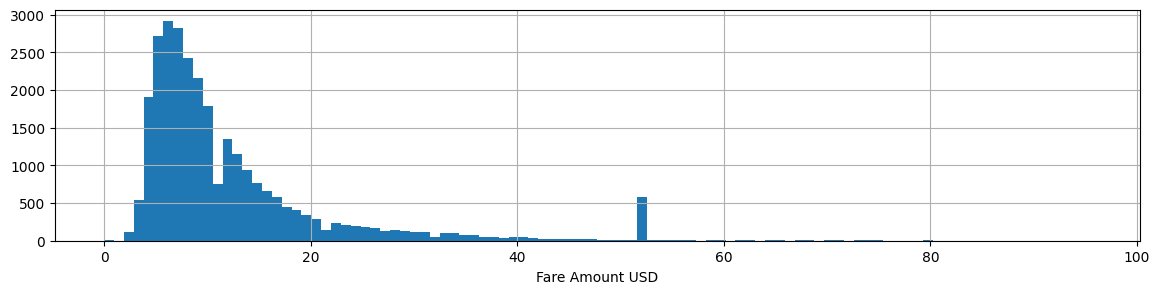

In [328]:
%matplotlib inline

df_data[df_data.fare_amount < 100].fare_amount.hist(bins=100, figsize=(14, 3))
plt.xlabel("Fare Amount USD")

From this histogram, we can see that most trips in New York have fare amount of less than $20 USD. To be more precise, 75-th percentile of the fare amount is equal to 14.

In [329]:
df_data.total_amount.quantile([.75, .9, .999])

0.750     17.15000
0.900     27.95000
0.999    106.31192
Name: total_amount, dtype: float64

Quantiles show that 99% of total amount is less than 100.7638. Let's remove the outliers.

In [330]:
df_data = df_data[df_data.total_amount < 100]

Text(0.5, 0, 'Total Amount USD')

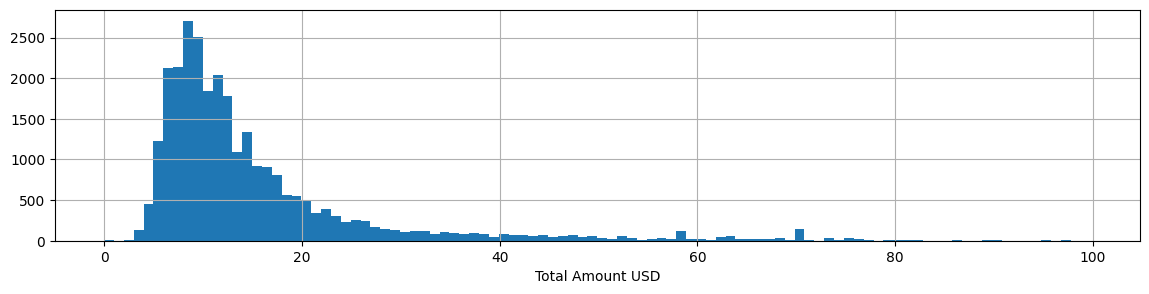

In [331]:
df_data[df_data.total_amount < 100].total_amount.hist(bins=100, figsize=(14, 3))
plt.xlabel("Total Amount USD")

From this histogram, we can see that most trips in New York have total price of less than $20 USD. To be more precise, 75-th percentile is equal to 17.15.

Both histograms contain a spike or multiple spikes between 40 and 60 USD. This may indicate some fixed-price routes, such as trips to airports. There are three airports in New York which explains multiple spikes.

In [332]:
# df_data[["total_amount", "fare_amount", "RatecodeID", "tip_amount", "dropoff_longitude", "pickup_longitude", "passenger_count"]].corr().total_amount
df_data.iloc[:, 1:].corr().total_amount

/var/folders/z5/qpnwrwtj27gd5kp0w62j__3w0000gn/T/ipykernel_17661/2747134322.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_data.iloc[:, 1:].corr().total_amount


VendorID                 0.020094
passenger_count          0.016967
trip_distance            0.935646
pickup_longitude         0.006843
pickup_latitude         -0.006480
RatecodeID               0.465010
dropoff_longitude        0.001101
dropoff_latitude        -0.001132
payment_type            -0.155541
fare_amount              0.983691
extra                    0.120733
mta_tax                 -0.160746
tip_amount               0.729603
tolls_amount             0.683192
improvement_surcharge   -0.009436
total_amount             1.000000
GoodTip                  0.417636
Extra                   -0.004316
Cash                    -0.157794
Name: total_amount, dtype: float64

In [333]:
# [["total_amount", "fare_amount", "RatecodeID", "tip_amount", "dropoff_longitude", "pickup_longitude", "passenger_count"]]
df_data.corr().total_amount

/var/folders/z5/qpnwrwtj27gd5kp0w62j__3w0000gn/T/ipykernel_17661/3060430360.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_data.corr().total_amount


Unnamed: 0               0.008657
VendorID                 0.020094
passenger_count          0.016967
trip_distance            0.935646
pickup_longitude         0.006843
pickup_latitude         -0.006480
RatecodeID               0.465010
dropoff_longitude        0.001101
dropoff_latitude        -0.001132
payment_type            -0.155541
fare_amount              0.983691
extra                    0.120733
mta_tax                 -0.160746
tip_amount               0.729603
tolls_amount             0.683192
improvement_surcharge   -0.009436
total_amount             1.000000
GoodTip                  0.417636
Extra                   -0.004316
Cash                    -0.157794
Name: total_amount, dtype: float64

From the correlation matrix, we see that total amount highly correlates with fare amount and the tip. This is sensible since they are one of main contributors to the price.

## Hypotheses

Our exploration helped us shape the following hypothesis
1. Certain routes have fixed-rate and result in the same total amounts.

We can also state these basic intuitions

2. Total amount correlates with the length of the trip.
3. Direction of the trip influences the total amount.

## Validating the hypotheses

### 1. Certain routes have fixed-rate and result in the same total amounts.

Most rides have standard rate code. Let's check how many rides there are with other rate codes. Value counts show that "Nassau or Westchester" and "Newark" are not well-represented in the dataset.

#### Explanation of codes


| Type                  | Code |
|-----------------------|------|
| Standard rate         | 1    |
| JFK                   | 2    |
| Newark                | 3    |
| Nassau or Westchester | 4    |
| Negotiated fare       | 5    |
| Group ride            | 6    |

In [334]:
df_data.RatecodeID.value_counts()

1    27731
2      573
5       65
3       29
4        5
Name: RatecodeID, dtype: int64

In [335]:
from enum import Enum

class HotspotCoordinates(Enum):
    # Source maps.google.com

    jfk = (-73.8148421, 40.6544961)  # John F. Kennedy International Airport
    lga = (-74.0140416, 40.7769271)  # LaGuardia Airport
    nwl = (-74.1744624, 40.6895314)  # Newark Liberty International Airport

In [336]:
def plot_total_amount_to(coords: HotspotCoordinates, ax, d_range=5):
    from geopy import distance

    key = "distance_to_" + coords.name

    df_data["pickup_" + key] = df_data.apply(
        lambda row: \
        distance.geodesic(
            (row.pickup_longitude, row.pickup_latitude), (coords.value[0], coords.value[1])
        ).km,
        axis=1
    )

    df_data[df_data["pickup_" + key] < d_range].total_amount.hist(bins=100, ax=ax[0])
    ax[0].set_xlabel("Total amount, $")
    ax[0].set_title("Histogram of pickup points within {} km of {}".format(d_range, coords.name))

    df_data["dropoff_" + key] = df_data.apply(
        lambda row: \
        distance.geodesic(
            (row.dropoff_longitude, row.dropoff_latitude), (coords.value[0], coords.value[1])
        ).km,
        axis=1
    )

    df_data[df_data["dropoff_" + key] < d_range].total_amount.hist(bins=100, ax=ax[1])
    ax[1].set_xlabel("Total amount, $")
    ax[1].set_title("Histogram of dropoff points within {} km of {}".format(d_range, coords.name))

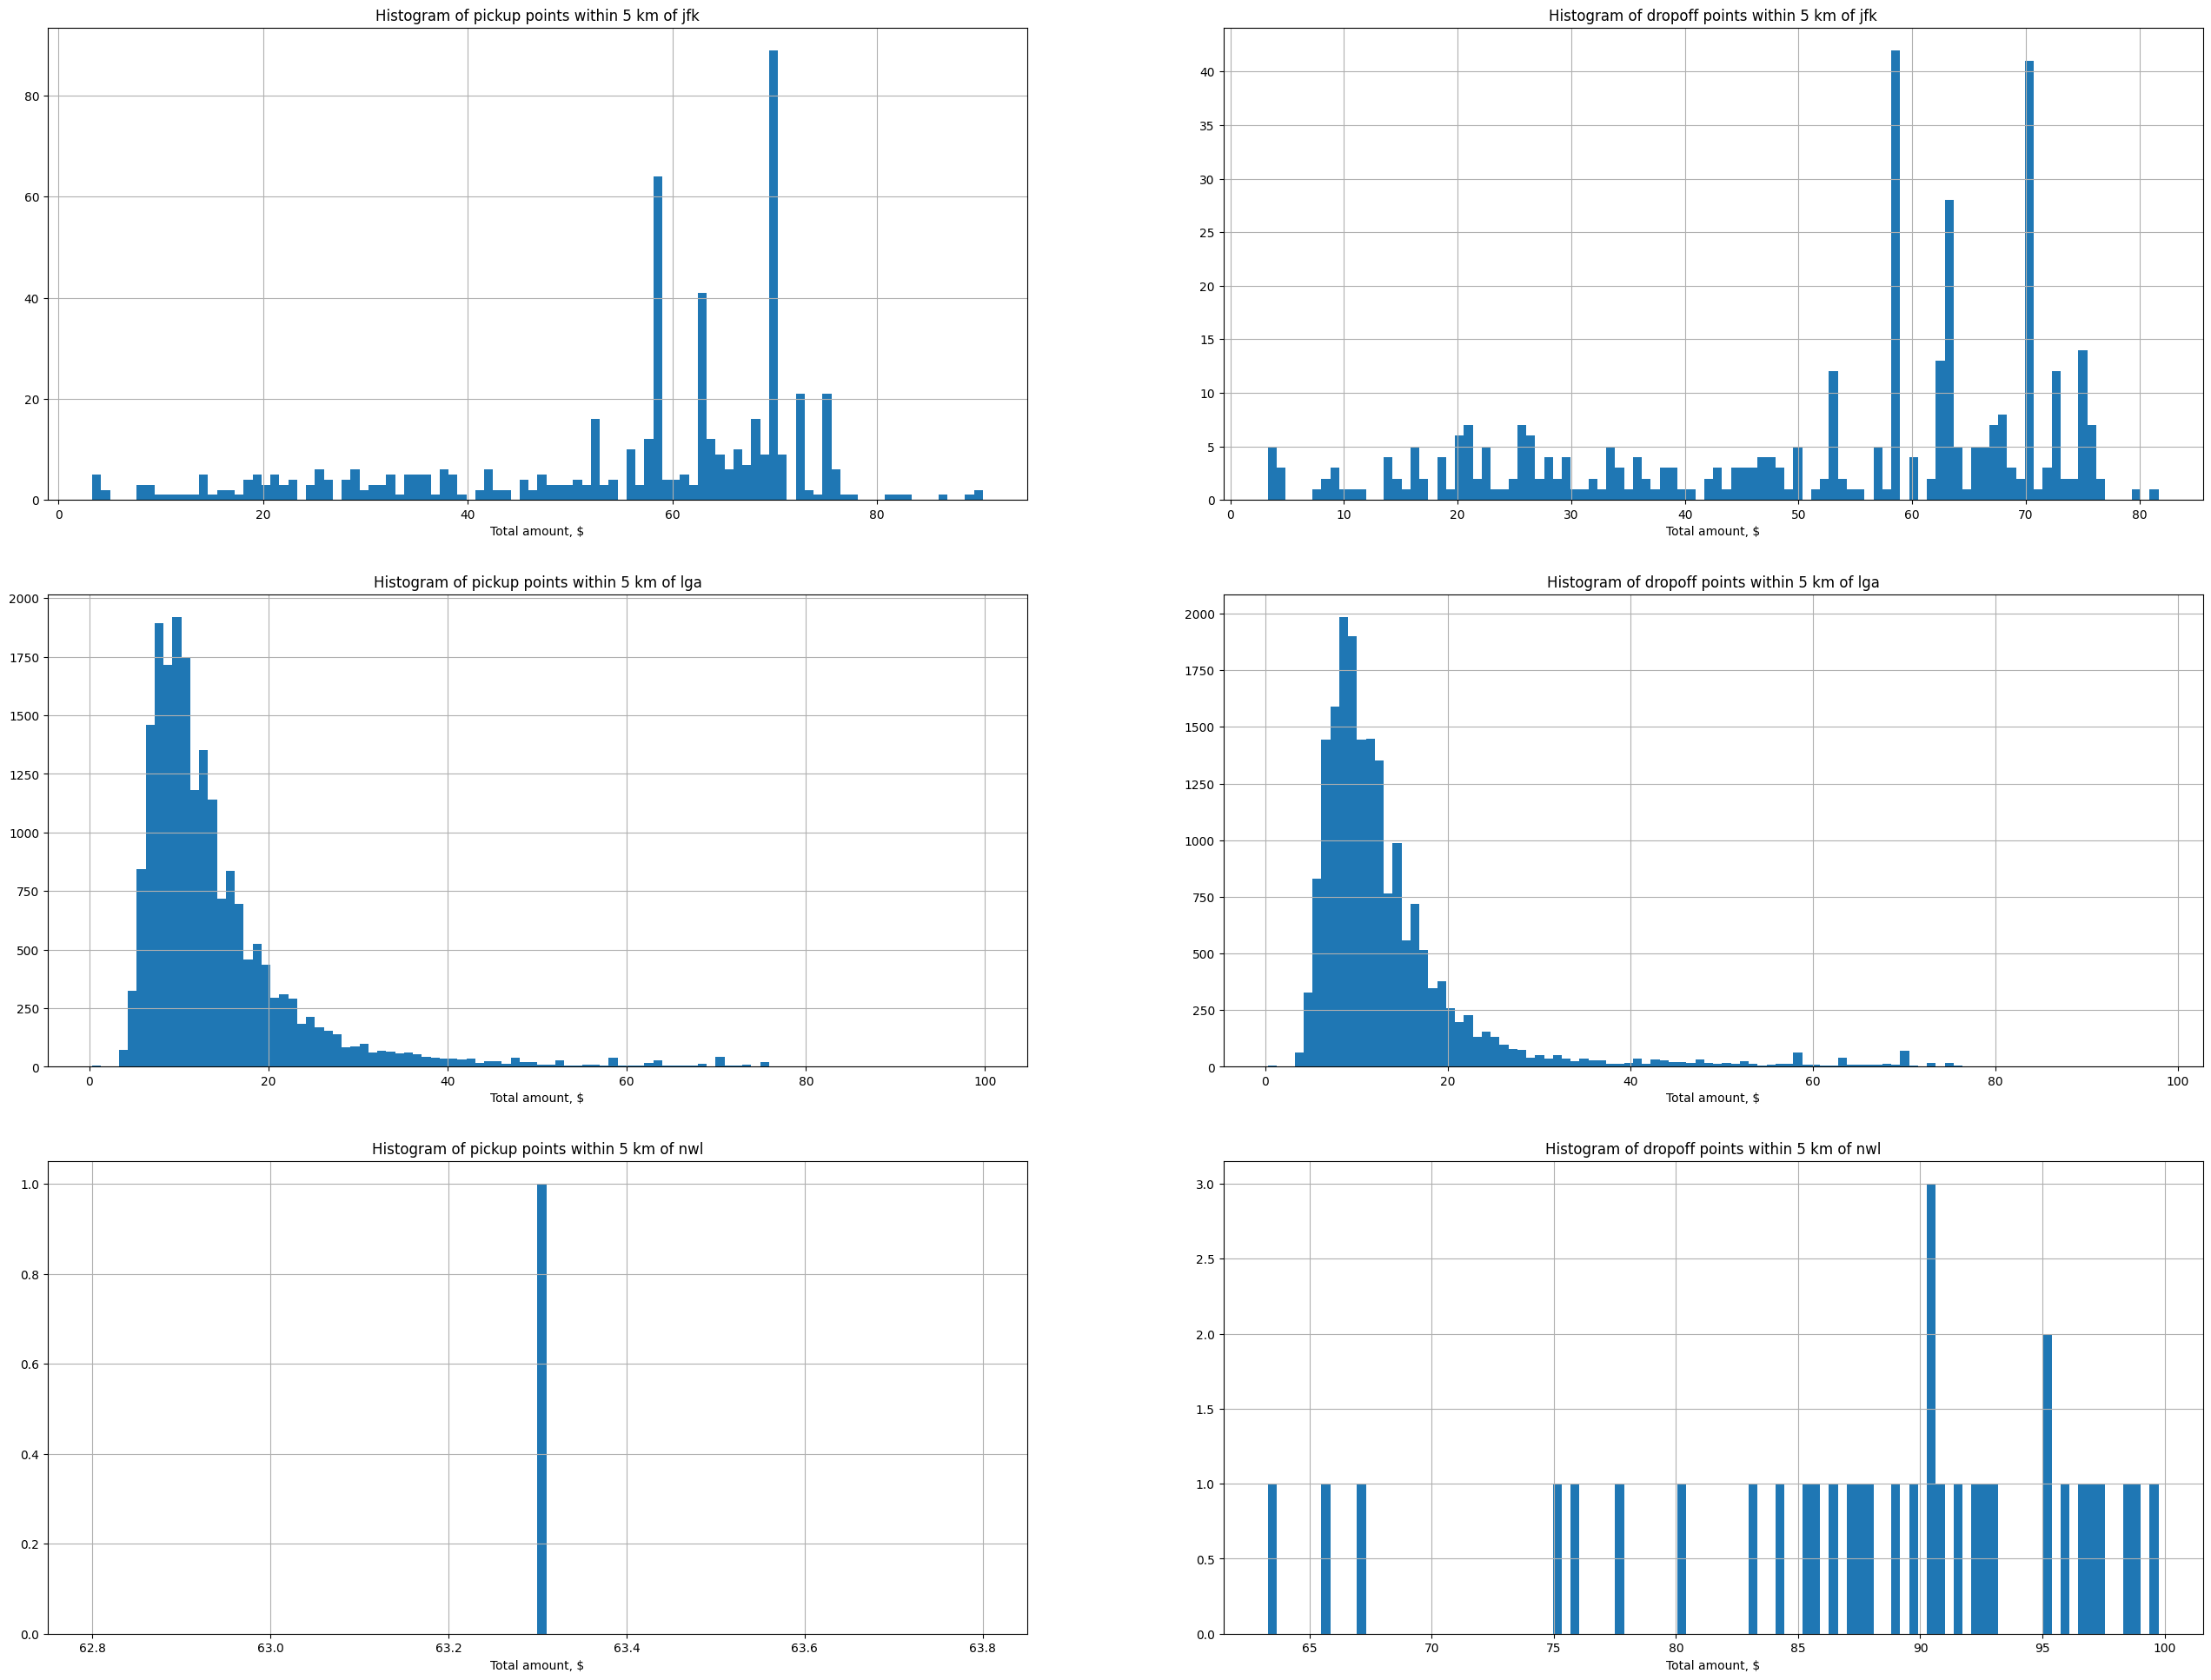

In [337]:
fig, axis = plt.subplots(3, 2, figsize=(32, 24))
plot_total_amount_to(HotspotCoordinates.jfk, axis[0])
plot_total_amount_to(HotspotCoordinates.lga, axis[1])
plot_total_amount_to(HotspotCoordinates.nwl, axis[2])

Fixed price tendency can be seen for the direction of LaGuardia airport and for JFK. Although, we do not have much data for JFK and the tendency is much less apparent.

### 2. Total amount correlates with the length of the trip.

We will compute flying distance between the points. This could give us a good perspective on data, although it might also produce garbage results on certain occasions:

1. When the trip is from point A to the same point A.
2. Some trips can be very long, but the resulting distance can be short, since we do not have access to intermediate stops.

Generally, the flying distance is the shortest path possible and a real car trip distance is usually longer. After this, we will use the original trip_distance value and see how well it compares.

In [338]:
from geopy import distance

In [339]:
df_data["distance_km"] = df_data.apply(
    lambda row: \
       distance.geodesic(
           (row.pickup_longitude, row.pickup_latitude), (row.dropoff_longitude, row.dropoff_latitude)
       ).km,
    axis=1
)

In [340]:
df_data.distance_km.describe()

count    28403.000000
mean        35.621138
std        532.480322
min          0.000000
25%          0.810415
50%          1.487675
75%          2.767449
max       8670.294587
Name: distance_km, dtype: float64

In [341]:
df_data.distance_km.quantile([.75, 0.9, .99])

0.75     2.767449
0.90     5.505229
0.99    23.238371
Name: distance_km, dtype: float64

From the data about percentiles, we can see that 99% of rides have distances that are less than 15 km.

In [342]:
df_data[["total_amount", "distance_km", "trip_distance"]].corr().total_amount

total_amount     1.000000
distance_km      0.008347
trip_distance    0.935646
Name: total_amount, dtype: float64

There is a high positive correlation between total price amount and the trip distance. This means that distance can become a good feature to make predictions. Real trip distance has higher correlation level than the flying

<AxesSubplot: >

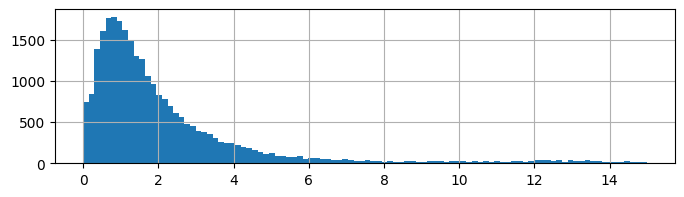

In [343]:
df_data[df_data.distance_km < 15].distance_km.hist(bins=100, figsize=(8, 2))

<AxesSubplot: >

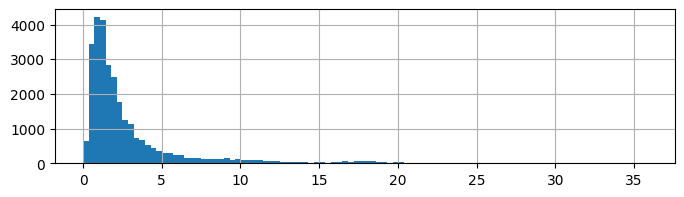

In [344]:
df_data[df_data.trip_distance < 100].trip_distance.hist(bins=100, figsize=(8, 2))

The histogram illustrates that 90% of the distances are less than 3.4 km. It also indicates two spikes at around 8 and 14 km, which might correspond to the trips to the NY airports. Let's remove outliers.


In [345]:
df_data = df_data[df_data.distance_km < 15]

Let us see how passengers count influences the distance and total price amount.

In [346]:
df_data.groupby("passenger_count")[["distance_km", "total_amount"]].quantile([.01, .9, .99])

distance_km  total_amount
passenger_count                                
1               0.01     0.000000        4.3000
                0.90     4.383661       24.3500
                0.99    13.028469       49.0100
2               0.01     0.000000        4.8000
                0.90     4.499317       24.9600
                0.99    13.400375       48.9080
3               0.01     0.000000        4.8000
                0.90     4.587335       24.0100
                0.99    13.019889       45.4100
4               0.01     0.000000        4.3000
                0.90     4.220468       23.4840
                0.99    12.387904       44.2176
5               0.01     0.000000        4.3000
                0.90     4.744082       25.5600
                0.99    13.431514       49.8216
6               0.01     0.029936        4.8000
                0.90     4.460493       24.3600
                0.99    12.717188       57.2550

Some zero-distance trips have non-zero total price amounts, which is not very sensible. Let's remove them

In [347]:
df_data = df_data[~((df_data.distance_km == 0) & (df_data.total_amount != 0))]

In [348]:
df_data.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,...,tolls_amount,improvement_surcharge,total_amount,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_lga,dropoff_distance_to_lga,pickup_distance_to_nwl,dropoff_distance_to_nwl,distance_km
count,26984.000000,26984.000000,26984.000000,26984.000000,26984.000000,26984.000000,26984.000000,26984.000000,26984.000000,26984.000000,...,26984.000000,26984.000000,26984.000000,26984.000000,26984.000000,26984.000000,26984.000000,26984.000000,26984.000000,26984.000000
mean,14231.912096,1.542618,1.667062,2.411011,-73.977550,40.752902,1.007152,-73.975451,40.753214,1.332493,...,0.166858,0.299978,13.941661,18.479617,18.257846,4.308012,4.568849,22.072682,22.312514,2.215386
std,8217.385592,0.498190,1.322016,2.382816,0.027284,0.024001,0.157297,0.027395,0.029933,0.485145,...,0.971592,0.002583,8.930332,2.717161,2.742664,2.897371,2.899488,3.062804,3.082258,2.425397
min,1.000000,1.000000,1.000000,0.000000,-74.159515,40.602329,1.000000,-74.161133,40.560780,1.000000,...,0.000000,0.000000,0.000000,1.560168,0.684449,1.014665,0.910128,2.349347,2.222834,0.000118
25%,7105.750000,1.000000,1.000000,0.970000,-73.992142,40.738712,1.000000,-73.991348,40.737069,1.000000,...,0.000000,0.300000,8.300000,17.574514,17.066933,2.669996,2.763950,20.414631,20.513798,0.820553
50%,14243.500000,2.000000,1.000000,1.600000,-73.982162,40.754494,1.000000,-73.980080,40.755169,1.000000,...,0.000000,0.300000,11.300000,18.964355,18.714560,3.650067,3.913155,21.583227,21.799826,1.461287
75%,21344.250000,2.000000,2.000000,2.860000,-73.968948,40.768372,1.000000,-73.964331,40.770255,2.000000,...,0.000000,0.300000,16.300000,19.981684,19.902620,5.070275,5.627050,23.062849,23.591558,2.600023
max,28454.000000,2.000000,6.000000,27.900000,-73.731010,41.012882,5.000000,-73.652260,41.012882,4.000000,...,21.000000,0.300000,97.880000,38.566613,38.746484,31.738512,40.546030,49.494076,58.289782,14.981382


Text(0.5, 1.0, '3. Distance < 5, total amount < 10')

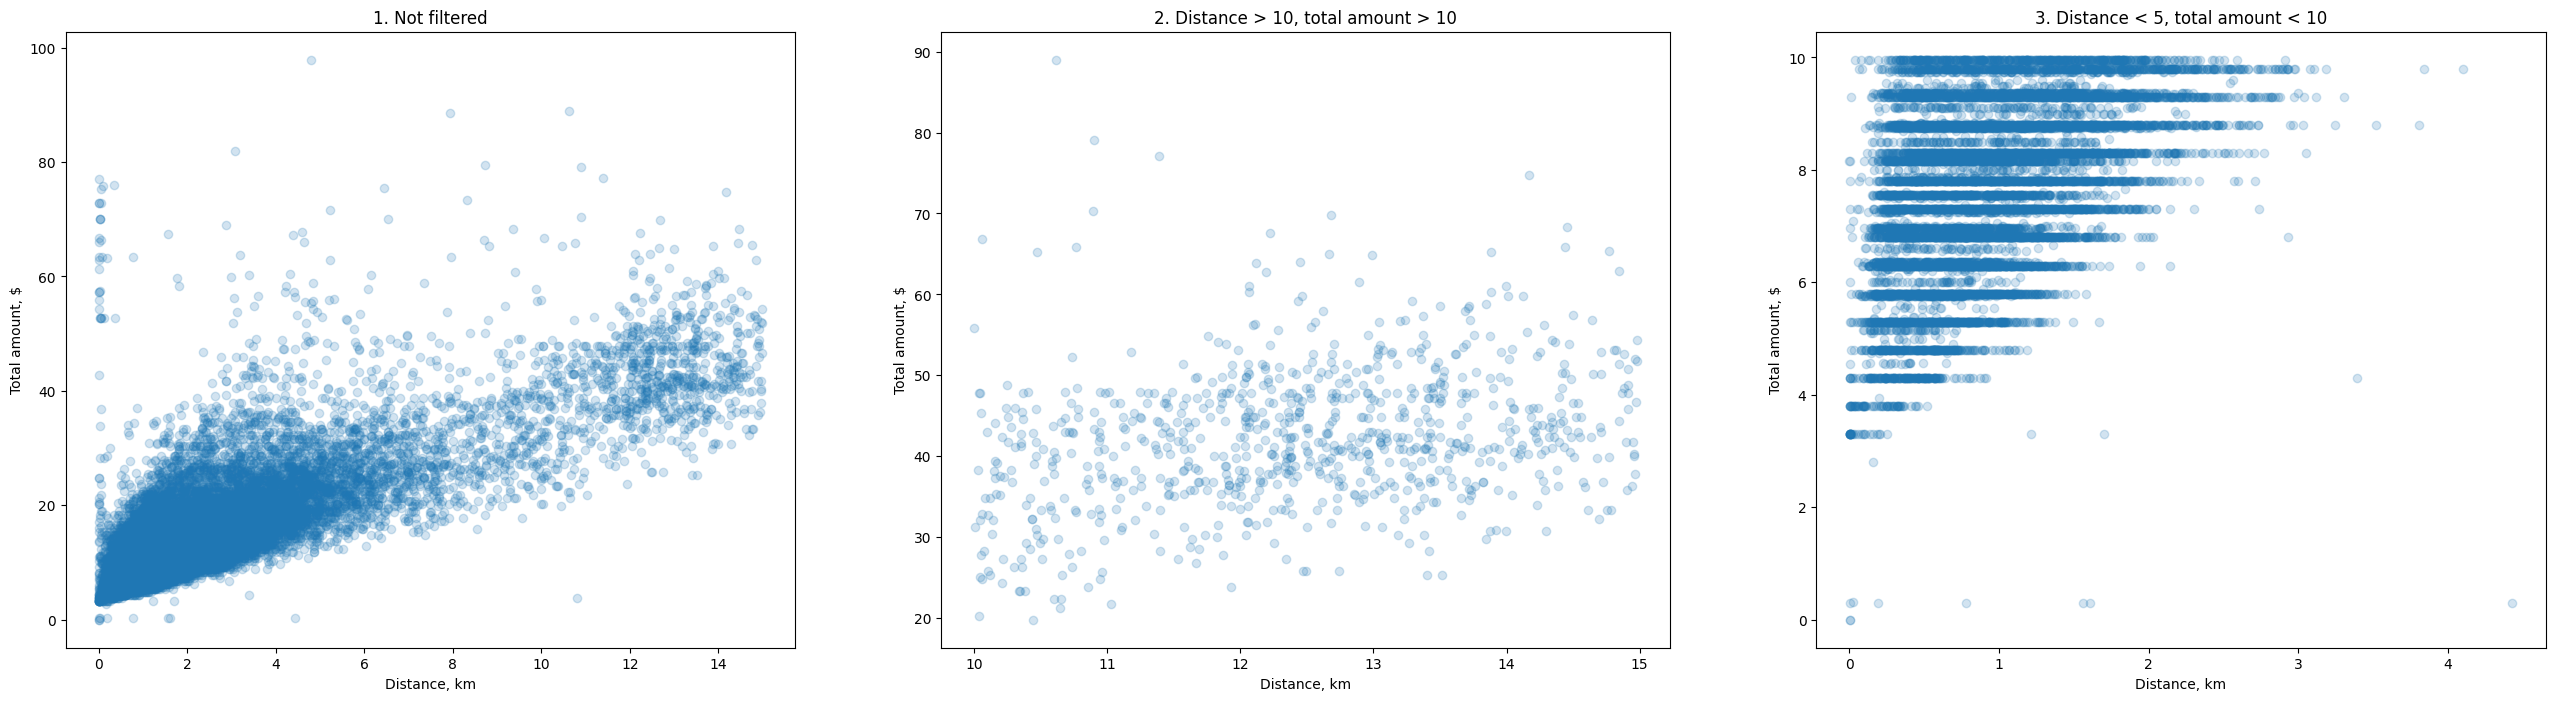

In [349]:
_, axs = plt.subplots(1, 3, figsize=(32, 8))
axs[0].scatter(
    df_data.distance_km,
    df_data.total_amount,
    alpha=0.2,
)

axs[0].set_ylabel("Total amount, $")
axs[0].set_xlabel("Distance, km")
axs[0].set_title("1. Not filtered")

predicate = (df_data.distance_km > 10) & (df_data.total_amount > 10)
axs[1].scatter(
    df_data[predicate].distance_km,
    df_data[predicate].total_amount,
    alpha=0.2,
)
axs[1].set_ylabel("Total amount, $")
axs[1].set_xlabel("Distance, km")
axs[1].set_title("2. Distance > 10, total amount > 10")

predicate = (df_data.distance_km < 5) & (df_data.total_amount < 10)
axs[2].scatter(
    df_data[predicate].distance_km,
    df_data[predicate].total_amount,
    alpha=0.2,
)
axs[2].set_ylabel("Total amount, $")
axs[2].set_xlabel("Distance, km")
axs[2].set_title("3. Distance < 5, total amount < 10")

#### 1. Not filtered
* The 1st plot shows a few trips with a distance that is greater than 6 km but with a lower total amount than the rest. Perhaps, these are discounted trips.
* The spread of total amount reduces as the distance decreases, which makes sense since the price is lower for shorter trips.

#### 2. Distance > 10, total amount > 10
* Straight lines on the 2nd plot might indicate fixed-fare long distance trips to airports or other possible hotspot locations.

#### 3. Distance < 5, total amount < 10
* Straight lines on the 3rd plot indicate that total amounts tend to integer values. This also reveals that many trips have fixed prices.

Apparently, knowing just distance is not enough to predict total amount. Even though the price tends to increase as the distance grows, the spread also increases.

### 3. Direction of the trip influences the total amount.

The shape of New York City is uneven in terms of distances and slopes, therefore it is plausible to suggest that the total amount depends on the direction of movement.

![](https://suncatcherstudio.com/uploads/patterns/us-states/outlines/thin/state/svg/new-york-state-outline-444444.png)

Brooklyn's and Long Island's bounding boxes were made with [bboxfinder](https://bboxfinder.com/#40.573368,-74.044850,40.697904,-73.867009). We will need them to isolate certain trips for our analysis.

![](images/brooklyn-bb.png)
![](images/long-island-bb.png)

In [350]:
df_data["delta_lon"] = df_data.pickup_longitude - df_data.dropoff_longitude
df_data["delta_lat"] = df_data.pickup_latitude - df_data.dropoff_latitude


def filter_within_bbox(df, bbox):
    """
        Filter dataframe by a bounding box defined by two longitudes and two latitudes.
        bbox = min Latitude , min Longitude , max Latitude , max Latitude
    """
    min_lat, min_lon, max_lat, max_lon = bbox

    return (
        (df.dropoff_longitude >= min_lon) & (df.dropoff_longitude <= max_lon) &
        (df.dropoff_latitude >= min_lat) & (df.dropoff_latitude <= max_lat) &
        (df.pickup_longitude >= min_lon) & (df.pickup_longitude <= max_lon) &
        (df.pickup_latitude >= min_lat) & (df.pickup_latitude <= max_lat)
    )

bbox_brooklyn = (40.573368, -74.044850, 40.697904, -73.867009)
bbox_long_island = (0.517006,-73.993682,41.204564,-71.826629)

print("Brooklyn bbox, shape = ", df_data[filter_within_bbox(df_data, bbox_brooklyn)].shape)
print("Long Island bbox, shape = ", df_data[filter_within_bbox(df_data, bbox_long_island)].shape)

Brooklyn bbox, shape =  (154, 32)
Long Island bbox, shape =  (17898, 32)


In [351]:
df_data[["delta_lat", "delta_lon"]].describe()

,delta_lat,delta_lon
count,26984.000000,26984.000000
mean,-0.000312,-0.002099
std,0.027077,0.028388
min,-0.264248,-0.133904
25%,-0.012810,-0.013657
50%,-0.000296,-0.001740
75%,0.012715,0.010233
max,0.199081,0.134186


Brooklyn bbox includes too few trips, let's use the entire Long Island approximation instead.

/Users/fenchelfen/strg/data-analytics/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


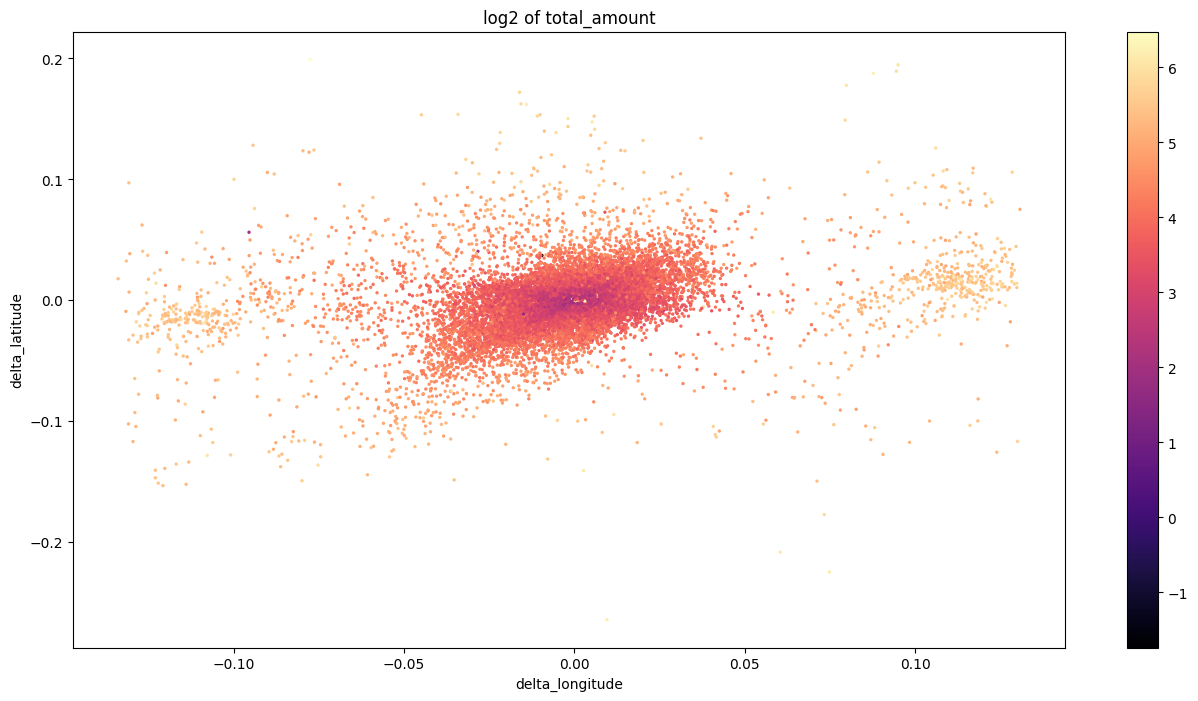

In [352]:
predicate_long_island = filter_within_bbox(df_data, bbox_long_island)

plt.figure(figsize=(16, 8))
plt.scatter(
    df_data[predicate_long_island].delta_lon,
    df_data[predicate_long_island].delta_lat,
    s=2,
    alpha=1.0,
    c=np.log2(df_data[predicate_long_island].total_amount),
    cmap="magma"
)
plt.colorbar()

plt.xlabel("delta_longitude")
plt.ylabel("delta_latitude")
plt.title("log2 of total_amount");

We can clearly see the linear dependency between the distance and amount. The greater delta is, the greater is the total amount. However, we cannot judge  how total amount influences on trip direction from this data alone.

# Data analysis

### First linear model

Using the correlation matrices and the analyses described above, we will go for the following features.

`total_amount ~ trip_distance, tip_amount, toll_amount`

In [367]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score

features = ["trip_distance", "tip_amount", "tolls_amount", "RatecodeID"]

df_data_train_x, df_data_x_test, df_data_y_train, df_data_y_test =\
    train_test_split(df_data, df_data.total_amount, test_size=0.2, random_state=10)

X, X_test, y, y_test = \
    df_data_train_x[features].values, df_data_x_test[features].values, df_data_y_train, df_data_y_test

print(f"No. of training data points: {X.shape[0]}")
print(f"No. of testing data points: {X_test.shape[0]}")

No. of training data points: 21587
No. of testing data points: 5397


In [368]:
def plot_actual_vs_predicted(y, y_predicted, ax):
    ax.scatter(y, y_predicted, alpha=0.2)

    min_y = min(np.min(y), np.min(y_predicted))
    max_y = max(np.max(y), np.max(y_predicted))

    ax.plot([min_y, max_y], [min_y, max_y], c="red")
    ax.set_xlabel("y")
    ax.set_ylabel("y_predicted")

def plot_residuals_hist(y, y_predicted, ax):
    rmse = np.sqrt(mean_squared_error(y, y_predicted))
    explained_var = explained_variance_score(y, y_predicted)
    ax.set_title("rmse = {:.2f}, evs = {:.2f}".format(rmse, explained_var))

    ax.hist(y - y_predicted, bins=50)
    ax.set_xlabel("Residual value")
    ax.set_title("Root-mean-square deviation")

Features =  ['trip_distance', 'tip_amount', 'tolls_amount', 'RatecodeID']


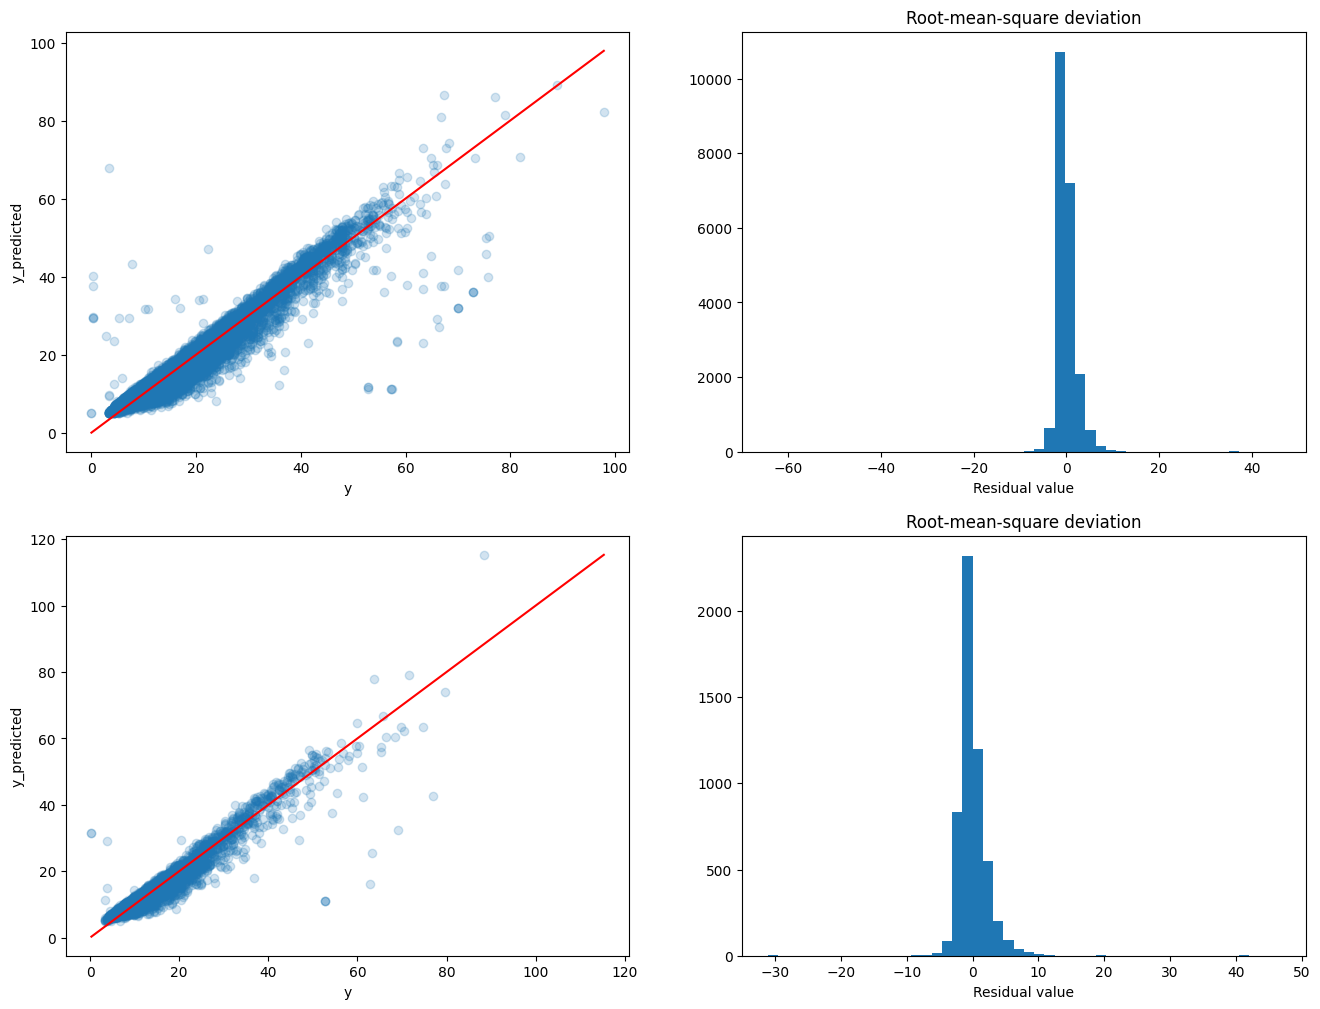

In [369]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

first_model = Pipeline([
    ("scaler", StandardScaler()),
    ("linear", LinearRegression()),
])
first_model.fit(X, y)

y_train_predicted = first_model.predict(X)
y_test_predicted = first_model.predict(X_test)

_, axis = plt.subplots(2, 2, figsize=(16, 12))
plot_actual_vs_predicted(y, y_train_predicted, axis[0][0])
plot_actual_vs_predicted(y_test, y_test_predicted, axis[1][0])

plot_residuals_hist(y, y_train_predicted, axis[0][1])
plot_residuals_hist(y_test, y_test_predicted, axis[1][1])

print("Features = ", features)

# Improving upon the base model

In [370]:
from sklearn.feature_selection import RFE
rfe_selector = RFE(
    estimator=LinearRegression(),
    n_features_to_select=4,
    step=20,
    verbose=5,
)

to_be_selected = ["trip_distance", "RatecodeID", "tip_amount", "tolls_amount", "dropoff_longitude", "pickup_longitude", "passenger_count"]
rfe_selector.fit(df_data[to_be_selected], df_data.total_amount)
rfe_support = rfe_selector.get_support()
rfe_support

Fitting estimator with 7 features.


array([ True,  True, False, False,  True,  True, False])

### Second linear model

Selected features =  ['trip_distance', 'RatecodeID', 'dropoff_longitude', 'pickup_longitude']
No. of training data points: 21587
No. of testing data points: 5397


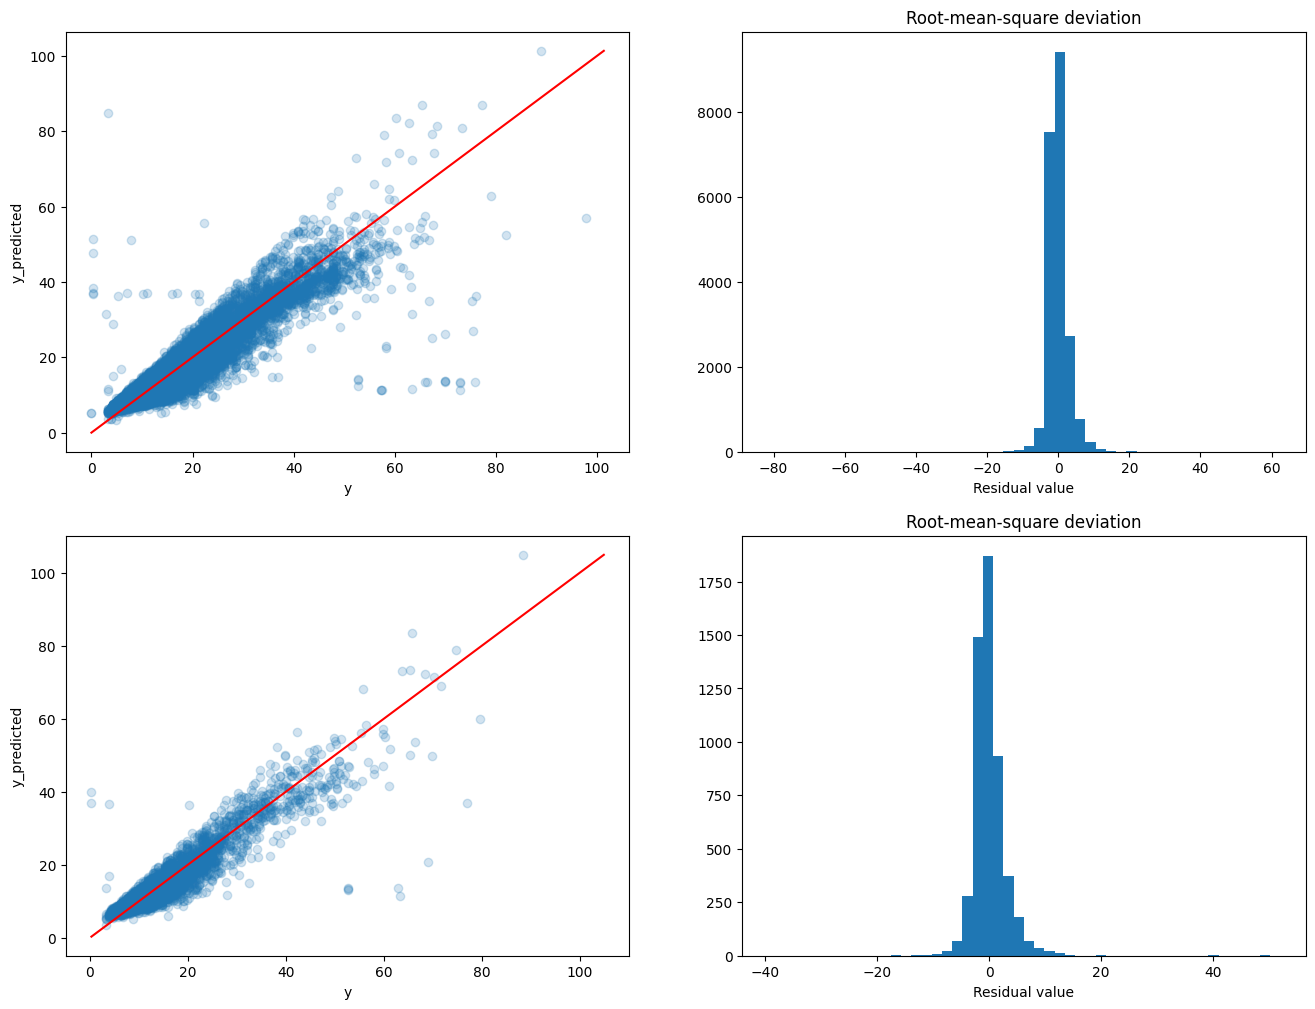

In [374]:
selected_features = [feature[0] for feature in zip(to_be_selected, rfe_support) if feature[1]]
print("Selected features = ", selected_features)

df_data_train_x_1, df_data_x_test_1, df_data_y_train_1, df_data_y_test_1 =\
    train_test_split(df_data, df_data.total_amount, test_size=0.2, random_state=10)

X_1, X_test_1, y_1, y_test_1 = \
    df_data_train_x_1[selected_features].values, df_data_x_test_1[selected_features].values, df_data_y_train_1, df_data_y_test_1

print(f"No. of training data points: {X_1.shape[0]}")
print(f"No. of testing data points: {X_test_1.shape[0]}")

second_model = Pipeline([
    ("scaler", StandardScaler()),
    ("linear", LinearRegression()),
])
second_model.fit(X_1, y_1)

y_train_predicted_1 = second_model.predict(X_1)
y_test_predicted_1 = second_model.predict(X_test_1)

_, axis = plt.subplots(2, 2, figsize=(16, 12))
plot_actual_vs_predicted(y_1, y_train_predicted_1, axis[0][0])
plot_actual_vs_predicted(y_test_1, y_test_predicted_1, axis[1][0])

plot_residuals_hist(y_1, y_train_predicted_1, axis[0][1])
plot_residuals_hist(y_test_1, y_test_predicted_1, axis[1][1])

In [375]:
first_score = first_model.score(X_test, y_test)
second_score = second_model.score(X_test_1, y_test_1)

In [376]:
first_score, second_score

(0.9166166501778084, 0.8698555257187237)

Recursive Feature Elimination suggested a different feature set:

1. trip_distance
2. dropoff_longitude
3. pickup_longitude
4. RatecodeID

While the original base model used this set:

1. trip_distance
2. tip_amount
3. tolls_amount
4. RatecodeID

The Linear Model performed better with the original feature set. This means that important features were dropped and RFE technique only made it worse. Cross validation could have helped us avoid this.

### Training Random Forest Regressor

In [387]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=500, max_depth=7, max_features=12)
forest.fit(X, y)
forest.feature_importances_

array([0.85207526, 0.10524118, 0.00752956, 0.035154  ])

In [390]:
forest.score(X_test, y_test)

0.939276842002685

Random Forest performs significantly better than the two previous Linear Regression models. This happens because Random Forest is able to capture many more of the linear dependencies within the dataset, and as we saw during the exploration phase, taxi car dataset has many linear patterns such as fixed fares and hotspot destinations.